In [2]:
import pandas as pd
import numpy as np
import json
import requests

In [3]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/pkgs/proj4-5.2.0-he1b5a44_1003/share/proj'

In [4]:
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [6]:
from mpl_toolkits.basemap import Basemap

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
import urllib, os

In [9]:
'''
NAME
    NetCDF with Python
PURPOSE
    To demonstrate how to read and write data with NetCDF files using
    a NetCDF file from the NCEP/NCAR Reanalysis.
    Plotting using Matplotlib and Basemap is also shown.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20140320 -- Initial version created and posted online
    20140722 -- Added basic error handling to ncdump
                Thanks to K.-Michael Aye for highlighting the issue
REFERENCES
    netcdf4-python -- http://code.google.com/p/netcdf4-python/
    NCEP/NCAR Reanalysis -- Kalnay et al. 1996
        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2
'''
import datetime as dt  # Python standard library datetime  module
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid


def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print ("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print ("\t\t%s:" % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print ("\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print ("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print ("\t%s:" % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim)
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ("\tName:", var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [9]:
nc_f = r"""E:\Hackathon_HackTheBay\Data\Water Temperature\2017\ICOADS_R3.0.1_2017-01.nc"""
nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)

NetCDF Global Attributes:
	ncei_template_version: 'NCEI_NetCDF_Point_Template_v2.0'
	featureType: 'point'
	title: 'International Comprehensive Ocean-Atmosphere Data Set (ICOADS) R3.0.1 data collected from 2017-01-01T00:00:00Z to 2017-01-31T23:58:47Z.'
	summary: 'This file contains ICOADS R3.0.1 data in netCDF4 format collected from 2017-01-01T00:00:00Z to 2017-01-31T23:58:47Z. The International Comprehensive Ocean-Atmosphere Data Set (ICOADS) offers surface marine data spanning the past three centuries, and simple gridded monthly summary products for 2-degree latitude x 2-degree longitude boxes back to 1800 (and 1degreex1degree boxes since 1960)--these data and products are freely distributed worldwide. As it contains observations from many different observing systems encompassing the evolution of measurement technology over hundreds of years, ICOADS is probably the most complete and heterogeneous collection of surface marine data in existence.'
	keywords: 'Earth Science > Atmosphere >

In [10]:
nc_fid.variables.keys() # I want 'time', 'date', 'lat', 'lon',and 'SST'

dict_keys(['time', 'date', 'crs', 'HR', 'lat', 'lon', 'TI', 'LI', 'DS', 'VS', 'NID', 'II', 'ID', 'DI', 'D', 'WI', 'W', 'VV', 'WW', 'W1', 'SLP', 'A', 'PPP', 'IT', 'AT', 'WBTI', 'WBT', 'DPTI', 'DPT', 'SI', 'SST', 'N', 'NH', 'CL', 'H', 'CM', 'CH', 'WP', 'WH', 'SD', 'SP', 'SH', 'B10', 'B1', 'DCK', 'SID', 'PT', 'DUPS', 'DUPC', 'ND', 'SF', 'AF', 'UF', 'VF', 'PF', 'RF', 'ZNC', 'WNC', 'BNC', 'XNC', 'YNC', 'PNC', 'ANC', 'GNC', 'DNC', 'SNC', 'CNC', 'ENC', 'FNC', 'TNC', 'QCZ', 'IX', 'W2', 'SD2', 'SP2', 'SH2', 'IS', 'ES', 'RS', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IR', 'RRR', 'TR', 'RH', 'RHI', 'UID', 'IRF'])

In [11]:
time_2017_01 = nc_fid.variables['time'][:]

In [12]:
date_2017_01 = nc_fid.variables['date'][:]

In [13]:
SST_2017_01 = nc_fid.variables['SST'][:]

<ipython-input-13-06ac91ab2ac6>:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  SST_2017_01 = nc_fid.variables['SST'][:]
<ipython-input-13-06ac91ab2ac6>:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  SST_2017_01 = nc_fid.variables['SST'][:]


In [14]:
nc_fid.variables['SST']

<class 'netCDF4._netCDF4.Variable'>
float32 SST(obs)
    _FillValue: -9999.0
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature  
    units: celsius
    valid_min: -99.9
    valid_max: 99.9
    coordinates: time lat lon
    grid_mapping: crs
    cell_methods: time: point
    comment: precision: tenths degree celsius
    ancillary_variables: SF SNC
unlimited dimensions: 
current shape = (4104797,)
filling on

In [15]:
nc_fid.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(obs)
    long_name: time
    standard_name: time
    units: days since 1662-10-15 12:00:00
    calendar: julian
    axis: T
    comment: Julian days since the beginning of the ICOADS record, which is 1662-10-15 12:00:00. Missing values of date (DD in date) are replaced by 0 and missing values in HR are filled with 0.0 in this calculation. See actual values in date, HR for reference.
unlimited dimensions: 
current shape = (4104797,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [16]:
nc_fid.variables['date']

<class 'netCDF4._netCDF4.Variable'>
|S1 date(obs, DATE_len)
    long_name: date in YYYYMMDD
    format: YYYYMMDD
    comment: YYYY: four digital year, MM: two digital month and DD: two digital date. Missing values of DD have been filled with 99.
unlimited dimensions: 
current shape = (4104797, 8)
filling on, default _FillValue of   used

In [17]:
SST_2017_01

masked_array(data=[--, 7.0, 4.0, ..., 11.899999618530273, --,
                   21.200000762939453],
             mask=[ True, False, False, ..., False,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [ ]:
import netCDF4
dtime = netCDF4.num2date(time_2017_01[:],nc_fid.variables['time'].units)

In [ ]:
dtime[:]

In [ ]:
lat_2017_01 = nc_fid.variables['lat'][:]

In [ ]:
lon_2017_01 = nc_fid.variables['lon'][:]

In [ ]:
lat_2017_01

In [ ]:
lon_2017_01

In [ ]:
# Cheseapeake Bay lat, lon = [37.0608, 76.0626]

In [ ]:
lat_cheseapeake =  37.0608
lon_cheseapeake =  76.0626

In [ ]:
time_2017_01

In [ ]:
date_2017_01

In [ ]:
SST_2017_01

In [ ]:
# squared difference of lat and lon

sq_dif_lat = (lat_2017_01 - lat_cheseapeake)**2
sq_dif_lon = (lon_2017_01 - lon_cheseapeake)**2

In [ ]:
# identify the minimum value of lat and lon
min_sq_dif_lat = sq_dif_lat.argmin()
min_sq_dif_lon = sq_dif_lon.argmin()

In [ ]:
min_sq_dif_lat

In [ ]:
min_sq_dif_lon

In [ ]:
lat_2017_01[687]

In [ ]:
lon_2017_01[min_sq_dif_lon]

In [ ]:
# verify
sq_dif_lat[687]

In [ ]:
sq_dif_lat.min()

In [ ]:
SST_2017_01

In [ ]:
water_temp = nc_fid.variables['SST']

In [ ]:
water_temp

In [ ]:
nc_fid.variables['date']

In [ ]:
dtime

In [ ]:
x = np.ma.array(dtime[:])

In [ ]:
dtime_2017_01 = x.filled() # save the masked array to an numpy array

In [ ]:
dtime_2017_01.size

In [ ]:
len(dtime_2017_01)

In [ ]:
str(dtime_2017_01[0])

In [ ]:
str(dtime_2017_01[0])[:7] # This is the time variable we want

In [ ]:
# dont run this, take a while

pd_water_temp = []

for i in range(0, 4104797):
    pd_water_temp.append(str(np.ma.array(water_temp[i:687:2206167]).filled()).strip('\]\['))

In [1]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\Cheseapeake Bay 2017"

E:\Hackathon_HackTheBay\Data\Water Temperature\Cheseapeake Bay 2017


In [10]:
water_temp_2017_01_drop_na = pd.read_excel("International_Comprehensive_Ocean_Atmosphere_Data_Set_ICOADS_2017_01.xlsx")

In [12]:
# issues:
# 1. a lot of missing water temperature for other timestaps
# 2. After dropping the records with missing values, the rest of the time stamps does not make sense
water_temp_2017_01_drop_na.head()

,time,Water Temperature celsius
0,2017-01-01 06:00:00,7.0
1,2017-01-01 18:00:00,4.0
2,2017-01-01 00:00:00,-4.6
3,2017-01-01 00:00:00,-8.5
4,2017-01-01 00:00:00,-7.0


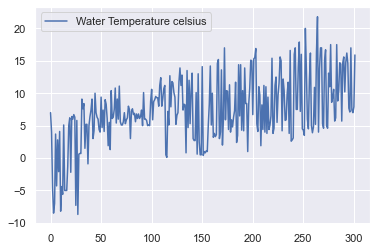

In [11]:
water_temp_2017_01_drop_na.plot()

In [ ]:
# The above data is from https://icoads.noaa.gov/products.html

In [ ]:
# Later I got data from : https://www.ndbc.noaa.gov/station_history.php?station=chbv2

In [13]:
# I think VA would be the area to focus on

In [14]:
cd "E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2017.txt"

E:\Hackathon_HackTheBay\Data\Water Temperature\chbv2h2017.txt


In [15]:
wt_2017_df = pd.read_csv("chbv2h2017.txt")

In [16]:
wt_2017_df.head()

,#YY MM DD hh mm WDIR WSPD GST WVHT DPD APD MWD PRES ATMP WTMP DEWP VIS TIDE
0,#yr mo dy hr mn degT m/s m/s m sec s...
1,2017 10 02 14 48 70 4.1 5.8 99.00 99.00 99....
2,2017 10 02 14 54 57 5.3 6.3 99.00 99.00 99....
3,2017 10 02 15 00 64 4.9 6.5 99.00 99.00 99....
4,2017 10 02 15 06 61 5.1 6.2 99.00 99.00 99....
